In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sn

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
len(y_train)

60000

In [6]:
len(y_test)

10000

In [7]:
X_train.shape

(60000, 28, 28)

<Figure size 432x288 with 0 Axes>

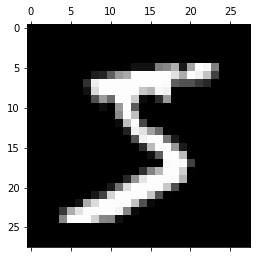

In [8]:
plt.gray()
plt.matshow(X_train[0])

In [9]:
X_train_flat = X_train.reshape(len(X_train) , 28*28)
X_test_flat = X_test.reshape(len(X_test) , 28*28)


In [10]:
X_train_flat.shape

(60000, 784)

In [11]:
X_test_flat.shape

(10000, 784)

In [12]:
model = keras.Sequential(
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
)

model.compile(

    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'

)

model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7746 - accuracy: 0.8387
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0735 - accuracy: 0.8780
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7786 - accuracy: 0.8838
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4480 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3174 - accuracy: 0.8861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3480 - accuracy: 0.8883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2994 - accuracy: 0.8881
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1839 - accuracy: 0.8903
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2416 - accuracy: 0.8890
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.171

In [24]:
model.evaluate(X_test_flat , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.4409 - accuracy: 0.8978


[5.440922260284424, 0.8978000283241272]

In [14]:
yhat = model.predict(X_test_flat)

313/313 [==============================] - 1s 2ms/step


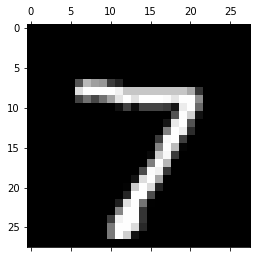

In [25]:
plt.matshow(X_test[0])

In [17]:
yhat_labels = [np.argmax(i) for i in yhat]

In [21]:
yhat_labels = pd.DataFrame(yhat_labels)

In [22]:
yhat_labels

,0
0,3
1,0
2,1
3,0
4,4
...,...
9995,2
9996,2
9997,4
9998,5


In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = yhat_labels)

<AxesSubplot:>

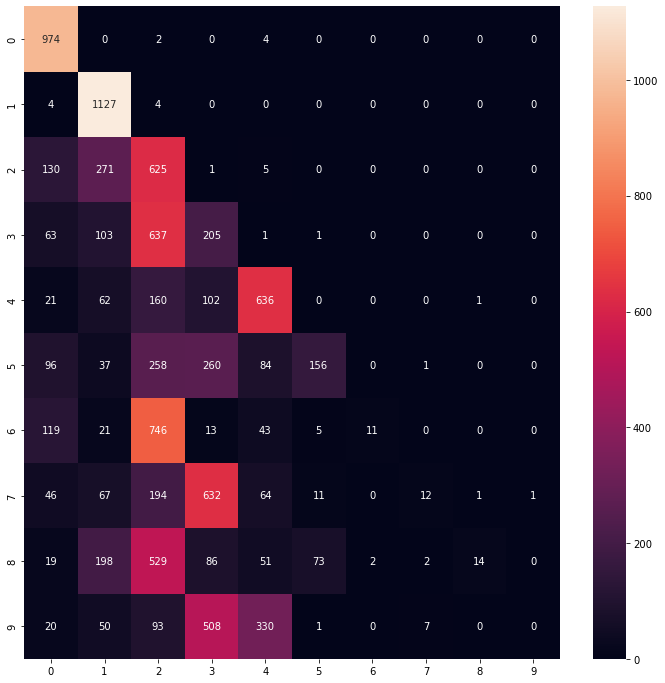

In [32]:
plt.figure(figsize=(12,12))
sn.heatmap(cm, annot=True, fmt='d')

In [34]:
model.evaluate(yhat_labels, y_test)

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 1)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=False
      • mask=None
